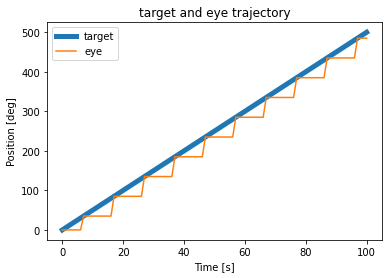

In [8]:
import matplotlib.pyplot as plt

# target movement parameters
target0=0
target_v=5

# eye parameters
eye0=0
saccade_v=200
saccade_threshold=30
saccade_delay=10

# data to be gathered
time_data : list = [0]
target_data : list = [0]
eye_data : list = [0]

# simulation parameters
t_step=1
t_stop=100

# initial state
t=0
target=target0
eye=eye0
saccade_flag=False
next_saccade=t

while t<t_stop:
    t=t+t_step
    target=target0+t*target_v
    if saccade_flag==False: #perception on when saccade not in operation
        error=target-eye
    if saccade_flag==False and t>=next_saccade and error>saccade_threshold: #saccade needed
        saccade_flag=True 
        saccade_target=eye+error
    if saccade_flag:
        if saccade_target-eye<=saccade_v*t_step:
            eye=saccade_target #caught up
            saccade_flag=False
            next_saccade=t+saccade_delay
        elif saccade_target-eye>saccade_v*t_step:
            eye=eye+saccade_v*t_step #lagging because top speed exceeded

    time_data.append(t)
    target_data.append(target)
    eye_data.append(eye)

plt.title('target and eye trajectory')
plt.xlabel('Time [s]')
plt.ylabel('Position [deg]')
plt.plot(time_data, target_data, linewidth=5)
plt.plot(time_data, eye_data)
plt.legend(('target', 'eye'))
plt.show()